### Import libraries and create DataFrame from csv 

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

# Function to read, preprocess, and aggregate full season data
def read_data():
    # Read the data
    data = pd.read_excel("WR_Data.xlsx")

    # Preprocess full season data, drop irrelevant columns and convert data types
    data.drop(['FL', 'ROST'], axis=1, inplace=True)
    convert = data.select_dtypes('object').columns.difference(['Player'])
    data[convert] = data[convert].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce')).fillna(0)
    data['Rank'] = data['Rank'].astype('Int64')

    return data

# Load the full season data
df = read_data()

# Recalculate 'Rank' based on 'FPTS' in descending order
df['Rank'] = df['FPTS'].rank(ascending=False, method='min').astype('int')

# Sort the DataFrame by 'Rank'
df = df.sort_values(by='Rank')

df.head(20)

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,G,FPTS,FPTS/G
0,1,CeeDee Lamb (DAL),135,181,1749,13.0,92,29,12,14,113,2,17,403.2,23.7
1,2,Tyreek Hill (MIA),119,171,1799,15.1,78,29,13,6,15,0,16,376.4,23.5
2,3,Amon-Ra St. Brown (DET),119,164,1515,12.7,70,24,10,4,24,0,16,330.9,20.7
3,4,Puka Nacua (LAR),105,160,1486,14.2,80,25,6,12,89,0,17,298.5,17.6
4,5,A.J. Brown (PHI),106,158,1456,13.7,59,21,7,0,0,0,17,289.6,17.0
5,6,DJ Moore (CHI),96,136,1364,14.2,58,25,8,4,21,1,17,286.5,16.9
6,7,Mike Evans (TB),79,136,1255,15.9,75,20,13,0,0,0,17,282.5,16.6
7,8,Keenan Allen (CHI),108,150,1243,11.5,42,19,7,2,6,0,13,278.9,21.5
8,9,Stefon Diggs (HOU),107,160,1183,11.1,55,10,8,1,5,0,17,273.8,16.1
9,10,Davante Adams (LV),103,175,1144,11.1,46,13,8,0,0,0,17,265.4,15.6


### Convert relevant stats to a per-game basis and create the final stats for analysis

In [96]:
# Define columns for per-game calculation
per_game = list(df.columns[2:])

# Define columns to exclude from the per-game calculation
exclude_per_game = ['Y/R', 'LG', 'G', 'FPTS', 'FPTS/G']

# Create columns and convert stats to a per-game basis for the defined columns, not those in the exclude list
for col in per_game:
    if col not in exclude_per_game:
        df[col + '/game'] = (df[col] / df['G']).round(1)

# Define final columns to be used for analysis, combines excluded and new per-game columns
final_columns = exclude_per_game + [col + '/game' for col in per_game if col not in exclude_per_game]

# Display final columns with 'Rank' and 'Player'
df[['Rank', 'Player'] + final_columns].head(10)

,Rank,Player,Y/R,LG,G,FPTS,FPTS/G,REC/game,TGT/game,YDS/game,20+/game,TD/game,ATT/game,YDS.1/game,TD.1/game
0,1,CeeDee Lamb (DAL),13.0,92,17,403.2,23.7,7.9,10.6,102.9,1.7,0.7,0.8,6.6,0.1
1,2,Tyreek Hill (MIA),15.1,78,16,376.4,23.5,7.4,10.7,112.4,1.8,0.8,0.4,0.9,0.0
2,3,Amon-Ra St. Brown (DET),12.7,70,16,330.9,20.7,7.4,10.2,94.7,1.5,0.6,0.2,1.5,0.0
3,4,Puka Nacua (LAR),14.2,80,17,298.5,17.6,6.2,9.4,87.4,1.5,0.4,0.7,5.2,0.0
4,5,A.J. Brown (PHI),13.7,59,17,289.6,17.0,6.2,9.3,85.6,1.2,0.4,0.0,0.0,0.0
5,6,DJ Moore (CHI),14.2,58,17,286.5,16.9,5.6,8.0,80.2,1.5,0.5,0.2,1.2,0.1
6,7,Mike Evans (TB),15.9,75,17,282.5,16.6,4.6,8.0,73.8,1.2,0.8,0.0,0.0,0.0
7,8,Keenan Allen (CHI),11.5,42,13,278.9,21.5,8.3,11.5,95.6,1.5,0.5,0.2,0.5,0.0
8,9,Stefon Diggs (HOU),11.1,55,17,273.8,16.1,6.3,9.4,69.6,0.6,0.5,0.1,0.3,0.0
9,10,Davante Adams (LV),11.1,46,17,265.4,15.6,6.1,10.3,67.3,0.8,0.5,0.0,0.0,0.0


### Calculate the correlations for the final stats across different conditions

In [97]:
# Define columns and columns to exclude for correlation calculation, from final columns
exclude_corr = ['FPTS/G', 'FPTS', 'G']
corr_columns = [col for col in final_columns if col not in exclude_corr]

# Define a function to calculate correlations
def compute_correlations(dataframe, corr_columns):
    return dataframe[corr_columns].corrwith(dataframe['FPTS/G'])

# Compute correlations for various conditions
corr_all = compute_correlations(df, corr_columns)
corr_nonzero = compute_correlations(df[df['FPTS/G'] > 0], corr_columns)
corr_top50 = compute_correlations(df[df['Rank'] <= 50], corr_columns)
corr_top25 = compute_correlations(df[df['Rank'] <= 25], corr_columns)

# Compile all correlations into a DataFrame for comparison
df_corr = pd.DataFrame({
    'All Players': corr_all,
    'FPTS > 0': corr_nonzero,
    'Top 50 Players': corr_top50,
    'Top 25 Players': corr_top25
})

# Calculate the average correlation across the four conditions, adding 'Average' column to DataFrame
df_corr['Correlation'] = df_corr.mean(axis=1)

# Display the correlation DataFrame
df_corr.round(2)

,All Players,FPTS > 0,Top 50 Players,Top 25 Players,Correlation
Y/R,0.67,0.29,0.19,0.05,0.30
LG,0.83,0.70,0.38,0.42,0.58
REC/game,0.98,0.97,0.87,0.81,0.91
TGT/game,0.97,0.96,0.82,0.71,0.87
YDS/game,0.99,0.98,0.94,0.90,0.95
20+/game,0.92,0.91,0.76,0.69,0.82
TD/game,0.85,0.83,0.66,0.53,0.72
ATT/game,0.22,0.14,0.24,0.17,0.19
YDS.1/game,0.20,0.13,0.20,0.15,0.17
TD.1/game,0.24,0.21,0.12,0.04,0.15


### Assign the weights for the final stats

In [98]:
# Calculate R^2 for the 'Average' correlation, adding 'R^2' column to DataFrame
df_corr['R^2'] = df_corr['Correlation'] ** 2

# Select stats with R^2 above a threshold for higher weight
high_weight_threshold = 0.5
specific_stats = df_corr[df_corr['R^2'] > high_weight_threshold].index.tolist()

# Select stats with R^2 below a threshold to exclude from final score
exclude_threshold = 0.1
exclude_stats = df_corr[df_corr['R^2'] < exclude_threshold].index.tolist()

# Define the calculation to assign weights
def weight_calc(row, specific_stats):
    if row.name in specific_stats:
        return 1 + row['R^2'] * 2 # Assign higher weight to specific stats
    else:
        return 1 + row['R^2'] # Assign weight to all other stats
    
# Assign weights based on the given criteria, adding 'Weight' column to DataFrame
df_corr['Weight'] = df_corr.apply(weight_calc, specific_stats=specific_stats, axis=1)

# Normalize weights
df_corr['Weight'] = df_corr['Weight'] / df_corr['Weight'].sum()

# Display the new columns in the DataFrame
df_corr[['Correlation', 'R^2', 'Weight']].round(2)

,Correlation,R^2,Weight
Y/R,0.30,0.09,0.06
LG,0.58,0.34,0.08
REC/game,0.91,0.83,0.15
TGT/game,0.87,0.75,0.14
YDS/game,0.95,0.90,0.16
20+/game,0.82,0.67,0.13
TD/game,0.72,0.52,0.11
ATT/game,0.19,0.04,0.06
YDS.1/game,0.17,0.03,0.06
TD.1/game,0.15,0.02,0.06


### Multiply the assigned weights to the final stats

In [99]:
# Multiply each relevant column by its corresponding weight
for col in corr_columns:
    if col not in exclude_stats:
        weight = df_corr.loc[col, 'Weight']
        df[col + '_weighted'] = (df[col] * weight).round(1)

# Extract the weighted columns
weight_columns = [col + '_weighted' for col in corr_columns if col not in exclude_stats]

# Display the new weighted stats columns
df_weight = df[['Rank', 'Player', 'FPTS/G'] + weight_columns]
df_weight.sort_values(by=['Rank'],ascending=True).head(10)

,Rank,Player,FPTS/G,LG_weighted,REC/game_weighted,TGT/game_weighted,YDS/game_weighted,20+/game_weighted,TD/game_weighted
0,1,CeeDee Lamb (DAL),23.7,6.9,1.2,1.5,16.2,0.2,0.1
1,2,Tyreek Hill (MIA),23.5,5.9,1.1,1.5,17.7,0.2,0.1
2,3,Amon-Ra St. Brown (DET),20.7,5.3,1.1,1.4,14.9,0.2,0.1
3,4,Puka Nacua (LAR),17.6,6.0,0.9,1.3,13.7,0.2,0.0
4,5,A.J. Brown (PHI),17.0,4.4,0.9,1.3,13.5,0.2,0.0
5,6,DJ Moore (CHI),16.9,4.4,0.8,1.1,12.6,0.2,0.1
6,7,Mike Evans (TB),16.6,5.6,0.7,1.1,11.6,0.2,0.1
7,8,Keenan Allen (CHI),21.5,3.2,1.2,1.6,15.0,0.2,0.1
8,9,Stefon Diggs (HOU),16.1,4.1,0.9,1.3,10.9,0.1,0.1
9,10,Davante Adams (LV),15.6,3.5,0.9,1.4,10.6,0.1,0.1


### Calculate each player's average weighted score and rank them from high to low

In [100]:
# Define select columns to be used for the average weighted score
avg = weight_columns + (['FPTS/G'] * 2) # Giving higher weight to FPTS/G

# Calculate the average weighted score for the select columns
df['Score'] = df[avg].mean(axis=1).round(2)

# Normalize the scores to be out of 10
scaler = MinMaxScaler(feature_range=(0, 10))
df['Score'] = scaler.fit_transform(df[['Score']]).round(2)

# Rank both of the average weighted scores with NaN handling
df['Final Rank'] = df.sort_values('Score', ascending=False)\
                ['Score'].rank(method='first', ascending=False, na_option='bottom').astype(int)

# Calculate the variance in ranking both ranks
df['Variance'] = df['Rank'] - df['Final Rank']

### Display results of the average weighted score and rank

In [101]:
# List of columns to be excluded
final_columns_exclude = ['Y/R', 'LG', 'ATT/game', 'YDS.1/game', 'TD.1/game']

# Exclude the specified columns from final_columns
final_columns = [col for col in final_columns if col not in final_columns_exclude]

# Create final analysis columns
analysis = df[['Rank', 'Final Rank', 'Player', 'Score', 'Variance'] + final_columns]
analysis.set_index('Rank', inplace=True)
analysis = analysis.sort_values(by='Final Rank', ascending=True)

# Export to Excel
analysis.to_excel("WR_Analysis.xlsx", index=False)

# Display the top 30 rows
analysis.head(30)

,Final Rank,Player,Score,Variance,G,FPTS,FPTS/G,REC/game,TGT/game,YDS/game,20+/game,TD/game
Rank,,,,,,,,,,,,
1,1,CeeDee Lamb (DAL),10.00,0,17,403.2,23.7,7.9,10.6,102.9,1.7,0.7
2,2,Tyreek Hill (MIA),10.00,0,16,376.4,23.5,7.4,10.7,112.4,1.8,0.8
3,3,Amon-Ra St. Brown (DET),8.76,0,16,330.9,20.7,7.4,10.2,94.7,1.5,0.6
8,4,Keenan Allen (CHI),8.75,4,13,278.9,21.5,8.3,11.5,95.6,1.5,0.5
33,5,Justin Jefferson (MIN),8.71,28,10,202.2,20.2,6.8,10.0,107.4,2.5,0.5
4,6,Puka Nacua (LAR),7.80,-2,17,298.5,17.6,6.2,9.4,87.4,1.5,0.4
12,7,Nico Collins (HOU),7.64,5,15,260.4,17.4,5.3,7.3,86.5,1.7,0.5
5,8,A.J. Brown (PHI),7.40,-3,17,289.6,17.0,6.2,9.3,85.6,1.2,0.4
6,9,DJ Moore (CHI),7.22,-3,17,286.5,16.9,5.6,8.0,80.2,1.5,0.5


### Compare per-game stats of two players and visualize the results

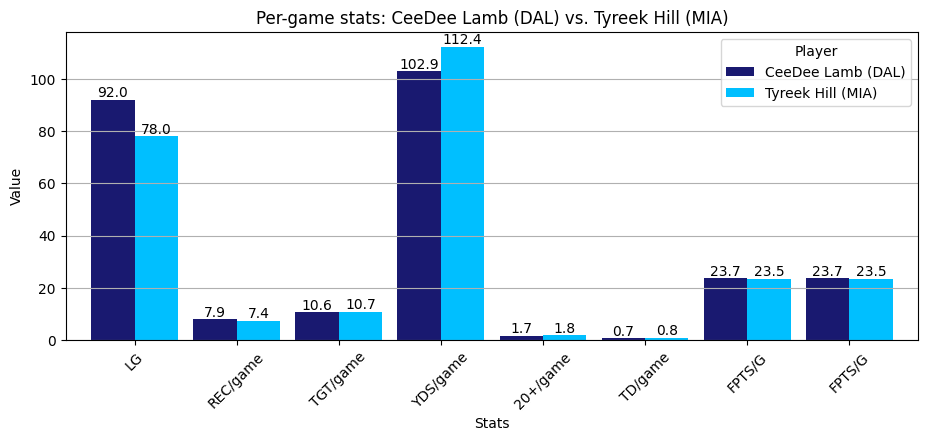

,Final Rank,G,FPTS,FPTS/G,REC/game,TGT/game,YDS/game,20+/game,TD/game
Player,,,,,,,,,
CeeDee Lamb (DAL),1,17,403.2,23.7,7.9,10.6,102.9,1.7,0.7
Tyreek Hill (MIA),2,16,376.4,23.5,7.4,10.7,112.4,1.8,0.8


In [102]:
# Prompt the user to input the name of the players
player1 = input("Enter player 1 name")
player2 = input("Enter player 2 name")

# Extract and reorder rows for the two specified players
# Filter rows where the 'Player' column contains the names entered by the user
players = df[df['Player'].str.contains(player1) | df['Player'].str.contains(player2)]
players.set_index('Player', inplace=True)
player1_match = players.index[0] if player1 in players.index[0] else players.index[1]
player2_match = players.index[1] if player2 in players.index[1] else players.index[0]
players = players.reindex([player1_match, player2_match])

# Define columns to be compared
compare_columns = [col.replace('_weighted', '') for col in avg]

# Define a function to compare per-game stats of two players
def compare(player1, player2):

    # Plot the data
    chart = players[compare_columns].T.plot(kind='bar',
                                            color=['midnightblue', 'deepskyblue'],
                                            width=0.85,
                                            figsize=(11,4))

    # Format chart
    plt.title(f'Per-game stats: {player1} vs. {player2}')
    plt.xlabel('Stats')
    plt.ylabel('Value')
    plt.grid(axis='y')
    plt.xticks(rotation=45)

    # Add data labels above the bars
    for p in chart.patches:
        chart.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')

    plt.show()

# Call the 'compare' function which creates and displays the visualization
compare(player1_match, player2_match)
players[['Final Rank'] + final_columns]